In [1]:
pip install statsmodels

/usr/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.8 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


# 生成时间序列数据
df_AMZN = pd.read_csv('AMZN.csv')

# Check for missing values & Print the count of missing values for each column
print('Check for missing values')
print('----------------------------------------')
missing_values_AMZN = df_AMZN.isnull().sum()
print(missing_values_AMZN)

Check for missing values
----------------------------------------
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [3]:
# 将 'Date' 列解析为日期时间格式
df_AMZN['Date'] = pd.to_datetime(df_AMZN['Date'])

In [4]:
print(df_AMZN.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [5]:
print(df_AMZN['Date'].min())

2013-10-01 00:00:00


In [6]:
print(df_AMZN['Date'].max())

2023-09-29 00:00:00


In [7]:


# 将日期列设置为索引
df_AMZN.set_index('Date', inplace=True)

# 生成按日连续的日期范围
date_range = pd.date_range(start=df_AMZN.index.min(), end=df_AMZN.index.max(), freq='D')

# 重新索引数据框
df_AMZN_reindexed = df_AMZN.reindex(date_range)

In [8]:
# 前向填充缺失值
df_AMZN_filled = df_AMZN_reindexed.ffill()

# 检查填充后的数据框的缺失值情况
print('Check for missing values')
print('----------------------------------------')
missing_values_AMZN_filled = df_AMZN_filled.isnull().sum()
print(missing_values_AMZN_filled)

Check for missing values
----------------------------------------
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


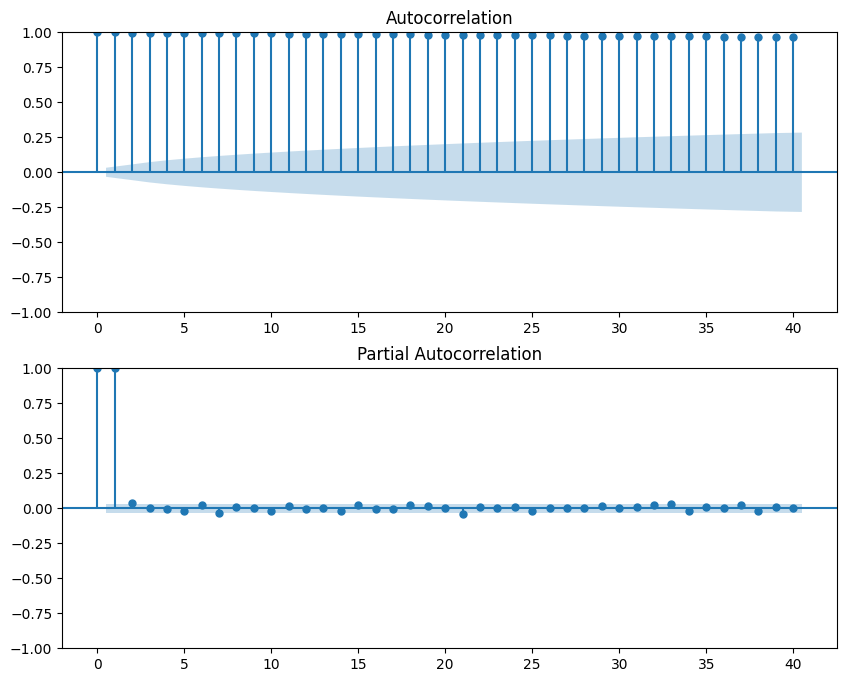

ADF Statistic: -1.165476
p-value: 0.688268
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
--------------------------------------------
KPSS Statistic: 8.121397
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/tmp/ipykernel_161/329377887.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = sm.tsa.stattools.kpss(ts)


In [9]:

# 提取 'Close' 列作为时间序列数据
ts = df_AMZN_filled['Close']

# 绘制ACF和PACF图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2)
plt.show()

# 进行平稳性检验
adf_result = sm.tsa.stattools.adfuller(ts)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))
print('--------------------------------------------')
    
# 进行KPSS检验
kpss_result = sm.tsa.stattools.kpss(ts)
print('KPSS Statistic: %f' % kpss_result[0])
print('p-value: %f' % kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print('\t%s: %.3f' % (key, value))

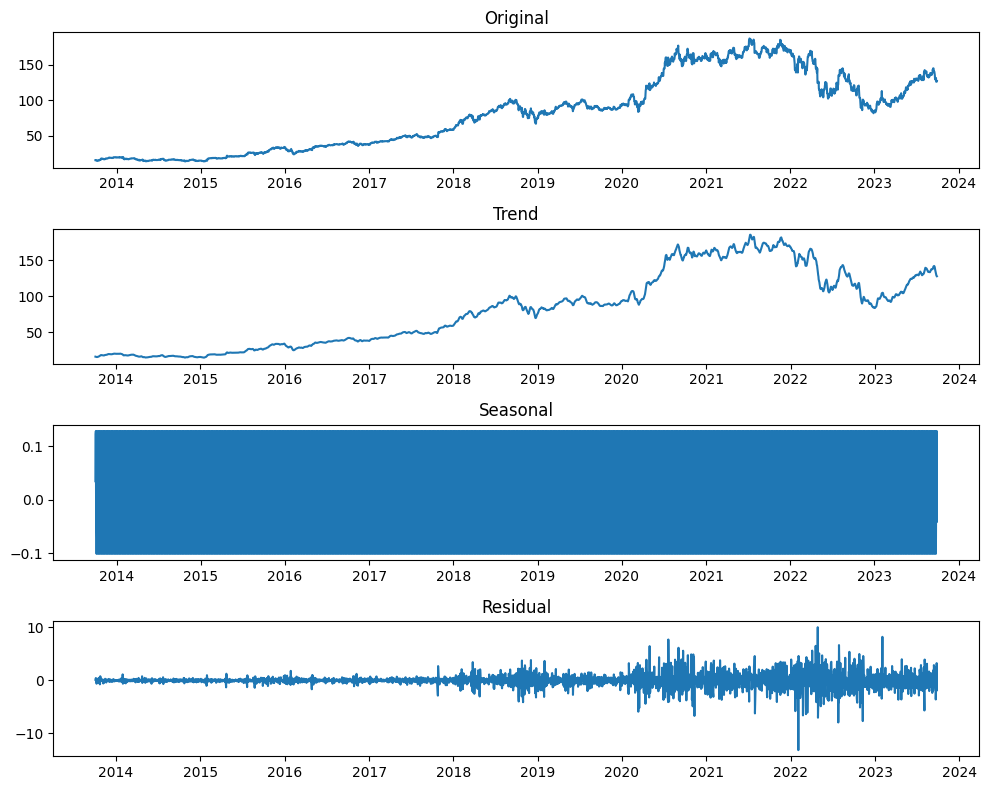

In [10]:
# 确保时间序列数据具有正确的频率
ts = ts.asfreq('D')

# 进行加法季节分解
result = sm.tsa.seasonal_decompose(ts, model='additive')

# 绘制分解后的趋势、季节性和随机成分
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
ax1.plot(ts)
ax1.set_title('Original')
ax2.plot(result.trend)
ax2.set_title('Trend')
ax3.plot(result.seasonal)
ax3.set_title('Seasonal')
ax4.plot(result.resid)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()